# Callbacks

### 'callbacks' kwarg of model's .fit() method allow to tune learning rate during training

In [5]:
import tensorflow as tf
dataset = tf.data.Dataset.range(100)
dataset = dataset.window(20, shift=1, drop_remainder=True)
dataset_flat = dataset.flat_map(lambda window: window.batch(5))
dataset_flat = dataset_flat.map(lambda window: (window[:-1], window[-1:]))

dataset = dataset_flat

window_size = 20

model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(10, activation="relu"), 
    tf.keras.layers.Dense(10, activation="relu"), 
    tf.keras.layers.Dense(1)
])

lr_schedule = tf.keras.callbacks.LearningRateScheduler(
    lambda epoch: 1e-8 * 10**(epoch / 20))

optimizer = tf.keras.optimizers.SGD(lr=1e-8, momentum=0.9)

model.compile(loss="mse", optimizer=optimizer)

history = model.fit(dataset, epochs=100, callbacks=[lr_schedule], verbose=1)

Epoch 1/100
324/324 [==============================] - 1s 3ms/step - loss: 5119.1831
Epoch 2/100
324/324 [==============================] - 0s 1ms/step - loss: 3886.3662
Epoch 3/100
324/324 [==============================] - 0s 1ms/step - loss: 3367.2628
Epoch 4/100
324/324 [==============================] - 1s 2ms/step - loss: 3137.0845
Epoch 5/100
324/324 [==============================] - 0s 1ms/step - loss: 2932.8637
Epoch 6/100
324/324 [==============================] - 0s 1ms/step - loss: 2696.8430
Epoch 7/100
324/324 [==============================] - 0s 1ms/step - loss: 2286.9083
Epoch 8/100
324/324 [==============================] - 0s 1ms/step - loss: 1563.3085
Epoch 9/100
324/324 [==============================] - 0s 1ms/step - loss: 612.9498
Epoch 10/100
324/324 [==============================] - 0s 1ms/step - loss: 83.9108
Epoch 11/100
324/324 [==============================] - 0s 1ms/step - loss: 6.1071
Epoch 12/100
324/324 [==============================] - 0s 1ms/step -

[1e-08, 0.001, 0, 10]

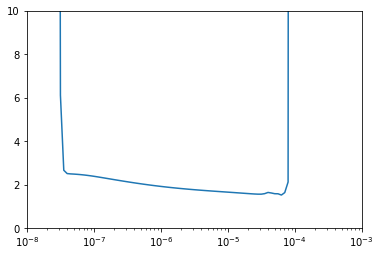

In [10]:
import matplotlib.pyplot as plt
import numpy as np

lrs = 1e-8 * (10 ** (np.arange(100) / 20))
plt.semilogx(lrs, history.history["loss"])
plt.axis([1e-8, 1e-3, 0, 10])

As a result here we may choose learning rate to be ~2e-5 (where it's close to minimum and still stable)